<a href="https://colab.research.google.com/github/suhanitatiya/Customer_segmentation/blob/main/customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Marketing Analytics Bootcamp**

###**Case study on: Customer Segmentation Strategies for Banking Marketing**

**Objective :** To enable participants to segment bank customers based on their behaviour and demographics, optimising marketing campaigns for targeted customer engagement and retention.

* To group customers into categories based on their behavior and demographics, like age, income, and spending habits.

* By understanding these groups, banks can create targeted marketing campaigns and offer personalized services that match each group's needs.

* This helps increase customer satisfaction, improves marketing efficiency, and boosts customer retention, ultimately leading to better returns on marketing investments.

**Scope of the project :** The algorithms used are as follows:


*   K Means Clustering
*   K Means++ Clustering
*   DBSCAN
*   Hierarchical Agglomerative Clustering (Dendrograms)










**What is customer segmentation?**

Customer segmentation in banking refers to the process of dividing a bank's customer base into distinct groups or segments based on shared characteristics, such as demographics, financial behaviors, or product usage

* In this project, the customers are segmented through their demographics information, loan information and product usage such as	Age,	Experience, 	Income, 	 Family,  	CCAvg,	 Education,	Mortgage	,etc....

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection** : Datasets have been collected from kaggle

* The dataset contains information on 5000 different customers for the financial institution. The dataset is available for download at the following website. https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [ ]:
# Load and display the dataset

df = pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx", "Data")

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


* **Data Preprocessing :** The concept of changing the raw data into a clean data set. (check missing values, noisy data, etc)

* **Data Cleaning :** The process of fixing or removing incorrect, incomplete or duplicate data from a dataset. Data cleaning aims to ensure that the data is accurate and reliable for analysis



To display all the information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


To delete the ID as well as the ZIP code

In [ ]:
remove = ['ID', 'ZIP Code']

df = df.drop(remove, axis=1)

In [ ]:
df.shape

(5000, 12)

To display the new information after deleting ID and ZIP Code

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


**Exploratory Data Analysis and Feature Engineering**

* **EDA:** Used by data scientists to analyze and investigate data sets and summarize the patterns in the data

* **Feature Engineering:** Process of creating new features or transforming existing features to improve the performance of a machine-learning model.


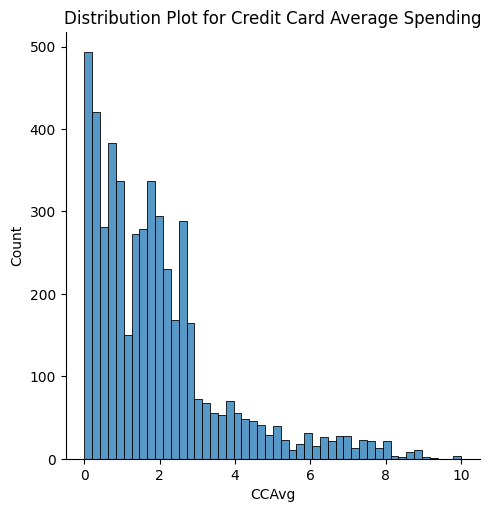

In [ ]:
ax = sns.displot(df['CCAvg'])
ax.set(title = 'Distribution Plot for Credit Card Average Spending')

In [ ]:
print('skew:', df['CCAvg'].skew())

skew: 1.598456618052042


The distribution plot above indicates that there a significant right skew for credit card average spending. In order to improve the performance of the model in the following section, a log transformation had been applied to this feature.

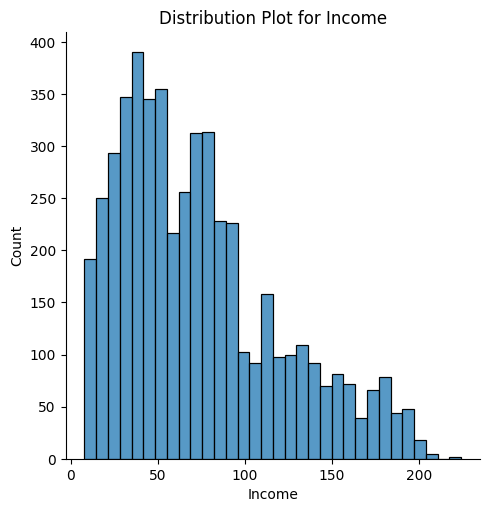

In [ ]:
ax = sns.displot(df['Income'])
ax.set(title = 'Distribution Plot for Income')

The same is done for the income column, where log transformation is applied.

In [ ]:
print('skew:', df['Income'].skew())

skew: 0.8413386072610816


In [ ]:
log_cols = df[['CCAvg', 'Income']]

for c in log_cols:
    df[c] = np.log1p(df[c])

In [ ]:
print('skew:', df['CCAvg'].skew())

skew: 0.31925236865480283


As shown above, the distribution for average credit card spending is closer to a normal distribution which is confirmed by a significant reduction in skew.

In [ ]:
print('skew:', df['Income'].skew())

skew: -0.42071189305490625


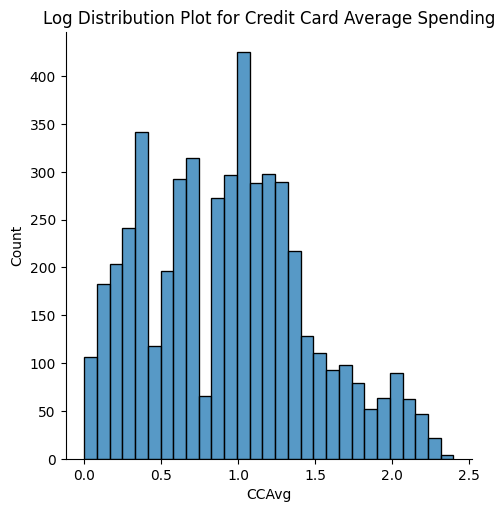

In [ ]:
ax = sns.displot(df['CCAvg'])
ax.set(title='Log Distribution Plot for Credit Card Average Spending')


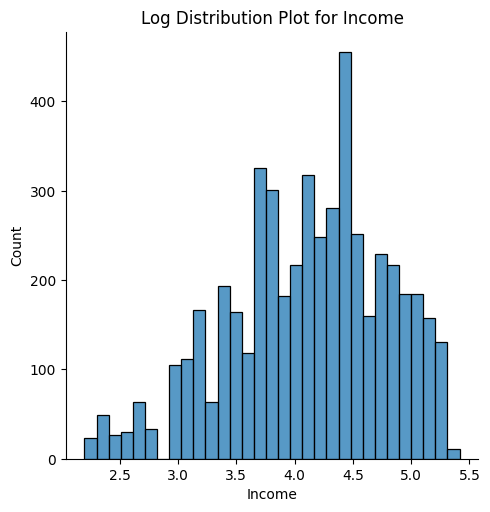

In [ ]:
ax = sns.displot(df['Income'])
ax.set(title='Log Distribution Plot for Income')

A pair plot/scatterplot matrix is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

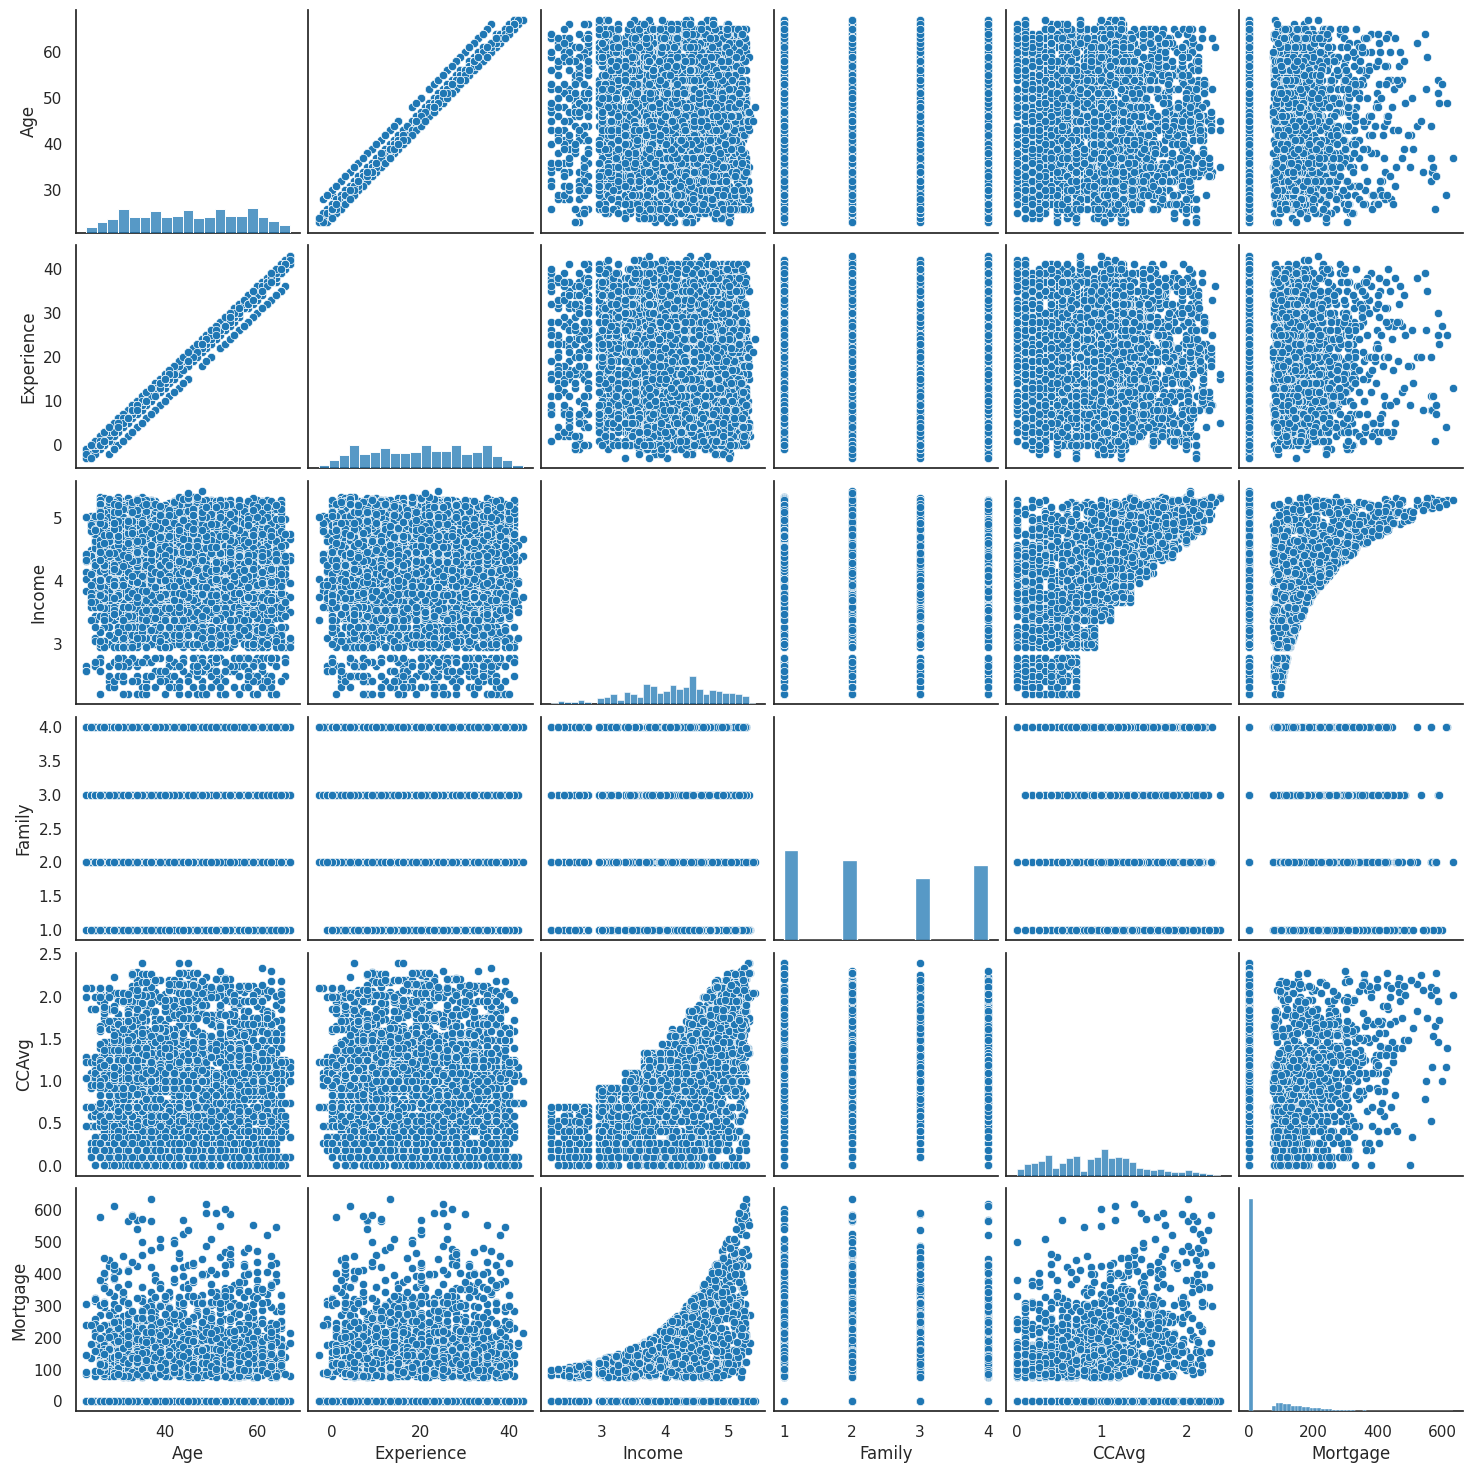

In [ ]:
pp = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]

sns.set_context('notebook')
sns.set_style('white')
fig = sns.pairplot(pp)

fig.savefig("pairplot1.png")

As shown above, there is strong correlation between the following features as follows



1.   Experience and age
2.   Income and credit card average spending
3.   Income and mortgage balance






##**Methodology**

###**K-Means Clustering -- Unsupervised learning model**

K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters.



**What does K Means Clustering do here ?**



K Means clustering algorithm partitions the dataset into a number of clusters. It will assign each data point into a cluster based on its nearest centroid using an iterative method where the distance (Euclidean in this case) is minimised.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_s = ss.fit_transform(df)

###**Elbow method**

**What is Elbow method?**

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.

 A loop calculates Sum of Squared Errors (SSE) also called inertia for a range of K values, allowing you to visually select the optimal number of clusters

* **Inertia:** The sum of squared
distances between each point and its assigned cluster’s centroid. It measures how tightly the data points are clustered around the centroids.

* **Sum of Squared Errors (SSE)**: SSE/"within-cluster sum of squares" represents the sum of the squared distances between each data point and the centroid of its cluster.

The optimal number of clusters can be identified using the elbow method as shown below:

Text(0, 0.5, 'Inertia')

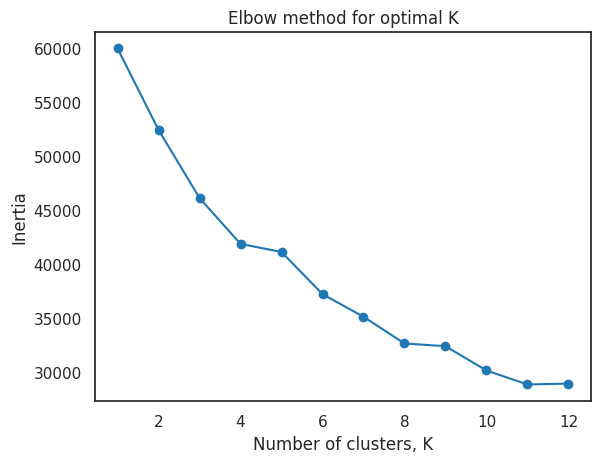

In [ ]:
from sklearn.cluster import KMeans

list_n_clusters = list(range(1,13))
inertia = []

for k in list_n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_s)
    inertia.append(km.inertia_)

plt.plot(list_n_clusters, inertia)
plt.scatter(list_n_clusters, inertia)
plt.title('Elbow method for optimal K')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')



**Note:** In the above graph, the inertia starts flattening out around 6 to 8 clusters. The choice of clusters can be subjective and the elbow method may not clearly indicate a point for the optimum number of cluster. In this, we used 6 clusters to minimise the number of segments as each segment will increase marketing cost substantially.

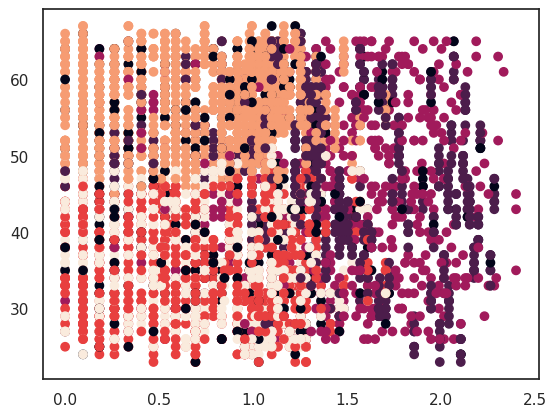

In [ ]:
km = KMeans(n_clusters=6)

km_model = km.fit(df_s)
labels = km_model.fit_predict(df_s)

plt.scatter(df['CCAvg'], df['Age'], c=labels)

In [ ]:
km_model.labels_

array([0, 0, 5, ..., 4, 4, 3], dtype=int32)

The table below shows the mean value for each feature under each cluster group using K Means.

 Each cluster group have distinct separation in terms of age, experience, education levels and mortgage level.

In [ ]:
df['KMeans_label'] = km_model.labels_
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,0
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,0
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,5
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,5
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,5


In [ ]:
df.groupby('KMeans_label').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
KMeans_label,,,,,,,,,,,,
0,45.391775,20.112554,4.001160,2.484848,0.883154,1.816017,49.846320,0.0,1.000,0.207792,0.606061,0.272727
1,46.728117,21.786472,4.778231,1.507958,1.457937,1.106101,88.680371,0.0,0.000,0.025199,0.620690,0.285146
2,45.066667,19.843750,4.956066,2.612500,1.478677,2.233333,100.845833,1.0,0.125,0.291667,0.606250,0.297917
3,35.505355,10.237585,3.930347,2.627069,0.747986,1.961052,42.679649,0.0,0.000,0.029211,1.000000,0.303797
4,56.468685,31.135582,3.751724,2.524432,0.706765,2.072953,41.125258,0.0,0.000,0.011700,0.631796,0.304198
5,36.824029,11.559466,3.903889,2.520631,0.770082,1.983010,49.280340,0.0,0.000,0.000000,0.000000,0.281553


The K Means model produced the following value counts to each of the 6 clusters (0 – 5):

In [ ]:
df['KMeans_label'].value_counts()

,count
KMeans_label,
4,1453
3,1027
5,824
1,754
2,480
0,462


Note: As we can see, most of the customers fall within cluster 1 and 2 which covers 56% of the total customers in the dataset. The smaller segments are from cluster 4 and cluster 5 with 847 and 480 respectively.

##**K Means ++ Clustering Technique in Customer segmentation**

K-Means++ is used as an enhancement to the standard K-Means algorithm to achieve more **efficient** and **accurate** customer segmentation

**Silhouette Score:** Evaluates the clustering quality by measuring how well-separated the clusters are.

###**Advantage of K means++ over K mean**

* **Increases Cluster Quality:** Better initial centroids mean more distinct clusters, helping to group customers accurately based on shared characteristics like spending habits or product preferences.


* **Improves Convergence Speed:** K-Means++ typically requires fewer iterations to converge, making it more efficient, especially with large datasets.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Data Standardization: The features are scaled to improve clustering performance.


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_s = ss.fit_transform(df)


In [ ]:
# Choose the optimal number of clusters using the Elbow Method (optional)
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_s)
    sse.append(kmeans.inertia_)

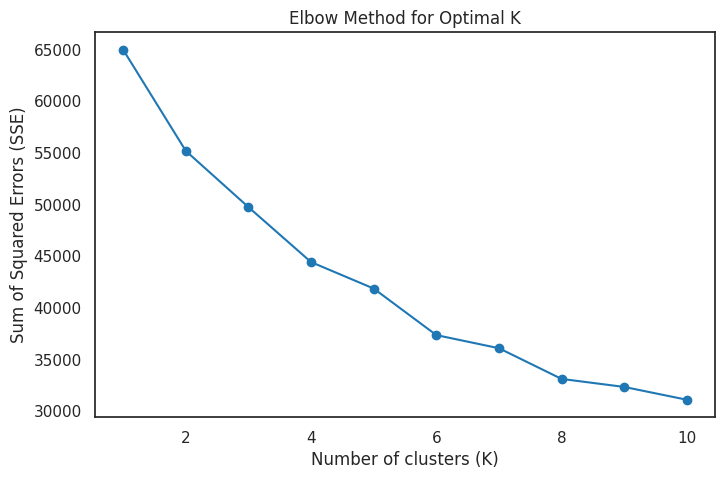

In [ ]:
# Plotting the Elbow Graph to find the optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Apply K-Means++ with the selected K (example: K=3)
optimal_k = 3  # Replace with the optimal K from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_s)

In [ ]:
# Add the cluster labels to the original data
#customer_data['Cluster'] = clusters

df['KMeans_label'] = km_model.labels_
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,0
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,0
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,5
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,5
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,5


Silhouette Score: Evaluates the clustering quality by measuring how well-separated the clusters are.

In [ ]:
# Evaluate the clustering with Silhouette Score
silhouette_avg = silhouette_score(df_s, km_model.labels_)
print(f'Silhouette Score for K={optimal_k}: {silhouette_avg}')

Silhouette Score for K=3: 0.16965135798658756


Visualization: Scatter plot of clusters, useful for visual interpretation.

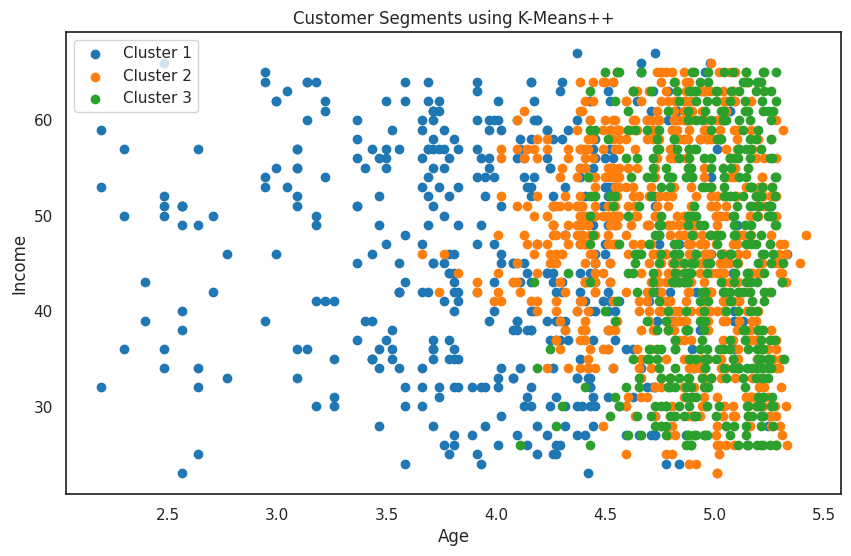

In [ ]:
# Visualize the clusters (for two principal components)
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(df.loc[df['KMeans_label'] == cluster, 'Income'],
                df.loc[df['KMeans_label'] == cluster, 'Age'],
                label=f'Cluster {cluster + 1}')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segments using K-Means++')
plt.legend()
plt.show()

###**Hierarchical Agglomerative Clustering (HAC) in customer segmentation**

#####**What is Hierarchical Agglomerative Clustering (HAC)?**

HAC treats each data point as a **single cluster** and subsequently merge closest pairs into clusters. This process continues until the whole dataset forms a single cluster. Therefore, a stopping criteria is required so HAC is able to cluster the data according to its requirements.

#####**What does HAC do here?**
For this analysis, we set the number of clusters to 6 to match the K Means model above. The **linkage** is set to **"ward"**, which is the inertia measurement, again which is consistent with the K Means model for comparison purposes.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
model_ac = ac.fit(df_s)
df['AC_label'] = model_ac.fit_predict(df_s)

df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label,AC_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,0,3
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,0,3
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,5,0
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,5,1
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,5,0


In [ ]:
df.groupby('AC_label').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label
AC_label,,,,,,,,,,,,,
0,50.854251,25.550607,3.795328,2.542510,0.713453,2.004555,42.474696,0.000000,0.000000,0.0,0.582490,0.474190,3.992915
1,36.186131,10.918248,3.985122,2.497080,0.810960,1.970073,45.194891,0.000000,0.000000,0.0,0.610219,0.003650,3.689051
2,45.701987,20.572848,4.465894,2.460265,1.183125,1.927152,92.324503,0.463576,0.486755,1.0,0.937086,0.794702,1.513245
3,45.180328,19.874317,4.008158,2.519126,0.890159,1.844262,47.117486,0.000000,1.000000,0.0,0.516393,0.122951,0.000000
4,48.147059,23.208978,4.765099,1.521672,1.459488,1.109907,93.193498,0.000000,0.000000,0.0,0.557276,0.298762,1.000000
5,44.670588,19.402941,4.945988,2.614706,1.470575,2.267647,92.108824,1.000000,0.026471,0.0,0.485294,0.147059,2.000000


* The table above shows the mean values for each feature according to each of the 6 different clusters. We can see less defined clustering in features such as age where there is a lot of overlapping between the different groups as shown in the boxplot below.

* The HAC model produces the following **value_counts** for each cluster as follows

In [ ]:
df['AC_label'].value_counts()

,count
AC_label,
0,1976
1,1370
4,646
3,366
5,340
2,302


Similar to K Means, HAC clustering produce 2 dominant clusters consisting 62% in total of the dataset. The smallest 3 clusters similar proportions of customers of between 300 to 400 customer profiles.

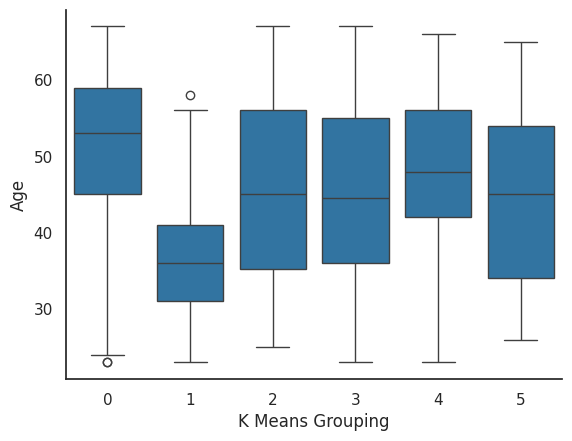

In [ ]:
sns.set_style('white')
ax = sns.boxplot(x='AC_label', y='Age', data=df)
ax.set(xlabel= 'K Means Grouping')
sns.despine()

###**Dendograms : Visual Representation used in Customer Segmentation**

* Dendograms allow us to see the structure of the data and how the clusters are related to each other.

* Dendrograms can also help us determine the optimal number of clusters to use in our analysis. We can do this by looking at the height of the branches in the dendrogram.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# We import the necessary libraries

The features are scaled to ensure clustering accuracy, as hierarchical clustering can be sensitive to the scale of data.

In [ ]:
# First, we Standardize the features as follows
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_s = ss.fit_transform(df)

*  'linkage' is used to perform hierarchical clustering.

* The method 'ward' is used for customer segmentation as it minimizes the variance within clusters at each step.

In [ ]:
# We Perform hierarchical agglomerative clustering
linked = linkage(df_s, method='ward')
# 'ward' minimizes variance within clusters

* The dendrogram function visualizes the hierarchy of clusters.

* Dendrograms are plotted as follows Customers against the x-axis and Euclidean distances against the y-axis

* The distance_sort= 'descending' arranges the branches to highlight the most significant clusters.

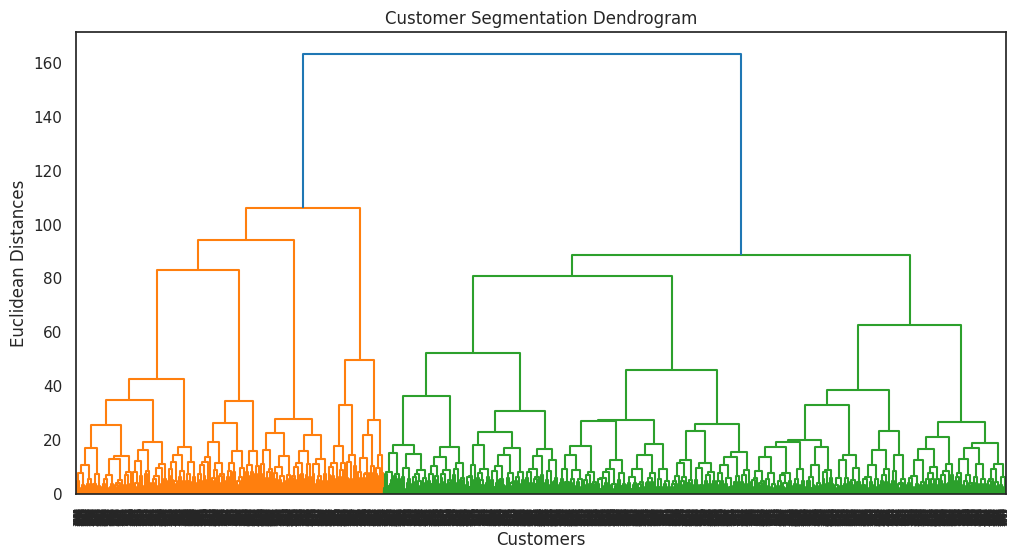

In [ ]:
# We plot the dendrogram as follows by plotting Customers against the x-axis and Euclidean distances against the y-axis
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Customer Segmentation Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

###**DBSCAN -- Density-Based Spatial Clustering of Applications with Noise**

* DBSCAN is a popular unsupervised learning method used for model construction and machine learning algorithms.

 * It is a clustering method utilized for separating high-density clusters from low-density clusters. It divides the data points into many groups so that points lying in the same group will have the same properties

In [ ]:
# First, we import required libraries as follows
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df.info() is checked once to check the dataypes of all the columns once. because only specific datatypes' elements like int are allowed and not float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   float64
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  KMeans_label        5000 non-null   int32  
 13  AC_label            5000 non-null   int64  
dtypes: float64(2), int32(1), int64(11)
memory usage: 527.5 KB


Standardization is applied to the features to ensure consistent scaling across all dimensions.


* Now we apply the DBSCAN algorithm as follows

* eps represents the radius of neighborhood and min_samples represents the min points to form a cluster, These are key parameters for DBSCAN

In [ ]:
# Now we allplt the DBSCAN algorithm as follows
# eps (radius of neighborhood) and min_samples (min points to form a cluster) are key parameters for DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
km_model.labels_ = dbscan.fit_predict(df_s)

 We add the cluster labels to the original data as follows

In [ ]:
# To Add the cluster labels to the original data
df['KMeans_label'] = km_model.labels_
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label,AC_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,-1,3
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,-1,3
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,-1,0
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,-1,1
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,-1,0


Then we Print the unique clusters identified as follows

In [ ]:
# To Print unique clusters identified
print("Clusters identified:", df['KMeans_label'].unique())

Clusters identified: [ -1  50   0   1  21   2  71   3   4   5   6   7   8  11  76   9  10  25
  62  12  13  20  26  30  51  14  23  77  44  15  69  24  48  16  17  18
  19  39 101  36  22  57  41  27  28  29  31  32  33  34  35  91  97  37
  38  74  68  99  40  42  43  75  45  46  87  47  79  49  58  94  66  52
  53  54 105  55  95  73  56  64  83  92  59  60  61 102  86 104 103  63
  65  67 106  70  72  93  98  81  80  82  78  88  84  85 100  89  90  96]


Then we print the number of clusters while excluding noise as follows

In [ ]:
# To Print the number of clusters excluding noise
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Estimated number of clusters: {n_clusters}')

Estimated number of clusters: 3


Next, we visualize the clusters for two principal components as follows 'Age' against x-axis and 'CreditCard' against y-axis

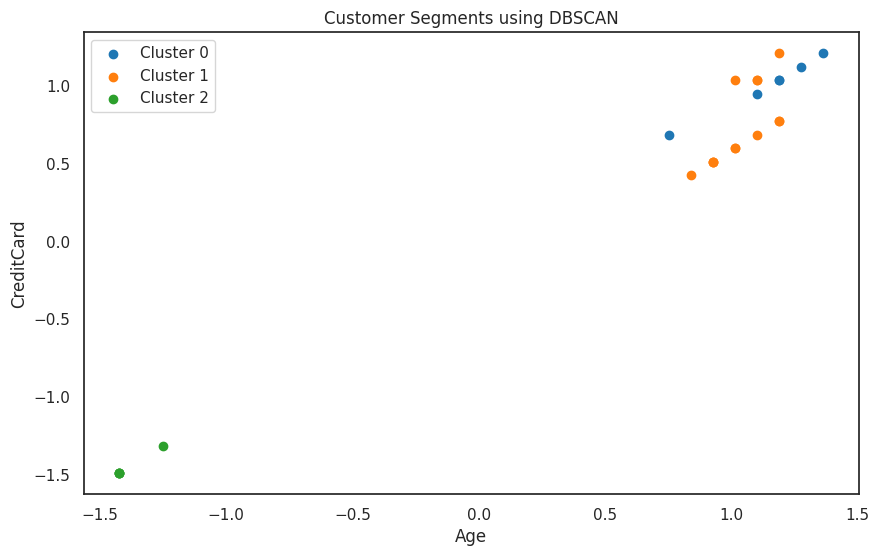

In [ ]:
# Visualize the clusters (for two principal components)
plt.figure(figsize=(10, 6))
unique_clusters = set(clusters)
for cluster in unique_clusters:
    if cluster == -1:
        # Plot noise points
        cluster_indices = df['KMeans_label'] == cluster
        plt.scatter(df_s[cluster_indices, 0],  #
                    df_s[cluster_indices, 1],
                    color='grey', label='Noise')
    else:
        cluster_indices = df['KMeans_label'] == cluster
        plt.scatter(df_s[cluster_indices, 0],
                    df_s[cluster_indices, 1],
                    label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('CreditCard')
plt.title('Customer Segments using DBSCAN')
plt.legend()
plt.show()

**Outcome :**  To allow participants to develop actionable customer segmentation strategies, improving marketing ROI and customer satisfaction in banking services.

* Results in higher customer satisfaction, improved marketing success, and better resource allocation, ultimately leading to stronger customer relationships and increased profitability for the bank.

**Benefits of customer segmentation in banking:-**

**1. Better Marketing--** Banks can target specific groups with the right ads and offers, saving money and making their campaigns more effective.

**2. More Sales Opportunities--** Banks can easily identify who might be interested in extra products, like loans or investment accounts, helping them make more sales.





**Conclusion:**

* For the analysis of customer segmentation, K Means clustering model is recommended as it produced well defined customer segments which can be used for targeted marketing strategy.

*  For the objective of this analysis, selection of number of clusters can be set according to the marketing budget or any predefined strategy by the marketing team.

* In this project we have made use of the algorithms namely K Means clustering technique, K Means++ clustering technique and Hierarchical clustering algorithm. Customer segmentation helps banks offer better service, save money, boost sales, and stay competitive.
